# Data analysis notebook

Notebook contains two parts:
1. *Paper Figures Generator* prepares the figures that are present in the paper,
2. *Supplementary figures generator* prepares supplementary figures that are not present in the paper, but can be helpful for getting insight into the underlying data.

*Paper figures are saved in the Paper_Figures directory.*

In [71]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.ticker as mtick
import sqlite3
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors

Matplotlib latex config:

In [72]:
plt.rc("text", usetex=True)  # latex ticks
plt.rc("text.latex")
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Computer Modern"],
    }
)
plt.rcParams["axes.linewidth"] = 0.4
plt.rcParams["xtick.major.width"] = 0.4
plt.rcParams["xtick.minor.width"] = 0.2
plt.rcParams["ytick.major.width"] = 0.4
plt.rcParams["ytick.minor.width"] = 0.2
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"

Slide_show_width = 4.71512
Paper_width = 6.30045
Format = 1
if Format == 0:
    Image_width = Slide_show_width
if Format == 1:
    Image_width = Paper_width

EXTRA_SMALL = 4
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 9

plt.rc("font", size=EXTRA_SMALL)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=EXTRA_SMALL)  # fontsize of the tick labels
plt.rc("ytick", labelsize=EXTRA_SMALL)  # fontsize of the tick labels
plt.rc("legend", fontsize=EXTRA_SMALL)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [33]:
df = pd.read_csv(
    "Data/preprocessed_dataset.csv"
)  # loading the minutely avg. continuous intraday prices

con = sqlite3.connect(
    "Forecasting/data_ID.db"
)  # load the preprocessed continuous intraday prices used in forecasting study

sql_str = f"SELECT * FROM with_dummies;"  # load only the data required for simu, so up to trade time
daily_data = pd.read_sql(sql_str, con)
daily_data["Time"] = pd.to_datetime(daily_data["Time"])

## Fig 1

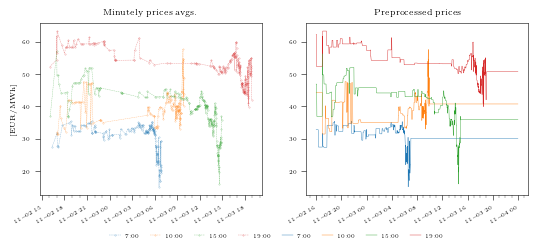

In [34]:
fig, axs = plt.subplots(ncols=2, figsize=(Image_width, 0.4 * Image_width))

ax = axs[0]
ttd_minutely = pd.date_range(
    datetime(year=2020, month=11, day=2, hour=16),
    datetime(year=2020, month=11, day=4, hour=0),
    freq="1min",
)
idxs = [int(7 * 4), int(10 * 4), int(15 * 4)]
labels = ["7:00", "10:00", "15:00", "19:00"]
for d_i, dat in enumerate(
    [
        "2020-11-03 07:00:00",
        "2020-11-03 10:00:00",
        "2020-11-03 15:00:00",
        "2020-11-03 19:00:00",
    ]
):
    current_data_avg = df[df["Datetime from"] == dat].groupby(
        "Time to delivery", as_index=False
    )
    price = []
    time_to_delivery = []
    for group in current_data_avg:
        price.append(
            np.sum(
                group[1]["Price (EUR)"].to_numpy() * group[1]["Volume (MW)"].to_numpy()
            )
            / np.sum(group[1]["Volume (MW)"])
        )
        time_to_delivery.append(
            pd.to_datetime(dat)
            - timedelta(minutes=group[1]["Time to delivery"].to_numpy()[0])
        )
    ax.plot(
        time_to_delivery,
        price,
        marker=".",
        ls="--",
        markersize=0.5,
        alpha=0.5,
        label=labels[d_i],
        lw=0.3,
    )

ax.set_ylabel("[EUR/MWh]")
hours = mdates.HourLocator(interval=1)
ax.xaxis.set_minor_locator(hours)
ax.set_title("Minutely prices avgs.")
plt.grid(which="both", axis="x")

ax = axs[1]
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["28"],
    label=labels[0],
    lw=0.3,
)
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["40"],
    label=labels[1],
    lw=0.3,
)
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["60"],
    label=labels[2],
    lw=0.3,
)
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["76"],
    label=labels[3],
    lw=0.3,
)
ax.set_title("Preprocessed prices")
ax.xaxis.set_minor_locator(hours)
plt.grid(which="both", axis="x")
plt.gcf().autofmt_xdate()
fig.legend(
    loc="outside lower center",
    ncol=8,
    frameon=False,
    borderaxespad=0,
    bbox_to_anchor=(0.5, 0.02),
)
fig.autofmt_xdate()
plt.savefig("Paper_Figures/example_of_preprocessing.pdf", bbox_inches="tight")

## Fig 2

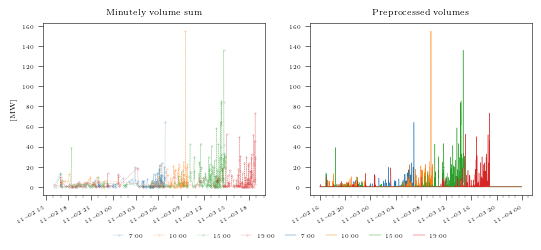

In [35]:
fig, axs = plt.subplots(ncols=2, figsize=(Image_width, 0.4 * Image_width))

ax = axs[0]
ttd_minutely = pd.date_range(
    datetime(year=2020, month=11, day=2, hour=16),
    datetime(year=2020, month=11, day=4, hour=0),
    freq="1min",
)
idxs = [int(7 * 4), int(10 * 4), int(15 * 4)]
labels = ["7:00", "10:00", "15:00", "19:00"]
for d_i, dat in enumerate(
    [
        "2020-11-03 07:00:00",
        "2020-11-03 10:00:00",
        "2020-11-03 15:00:00",
        "2020-11-03 19:00:00",
    ]
):
    current_data_avg = df[df["Datetime from"] == dat].groupby(
        "Time to delivery", as_index=False
    )
    price = []
    time_to_delivery = []
    for group in current_data_avg:
        price.append(np.sum(group[1]["Volume (MW)"]))
        time_to_delivery.append(
            pd.to_datetime(dat)
            - timedelta(minutes=group[1]["Time to delivery"].to_numpy()[0])
        )
    ax.plot(
        time_to_delivery,
        price,
        marker=".",
        ls="--",
        markersize=0.5,
        alpha=0.5,
        label=labels[d_i],
        lw=0.3,
    )

ax.set_ylabel("[MW]")
hours = mdates.HourLocator(interval=1)
ax.xaxis.set_minor_locator(hours)
ax.set_title("Minutely volume sum")
plt.grid(which="both", axis="x")

ax = axs[1]
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["124"],
    label=labels[0],
    lw=0.3,
)
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["136"],
    label=labels[1],
    lw=0.3,
)
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["156"],
    label=labels[2],
    lw=0.3,
)
ax.plot(
    daily_data[daily_data["Day"] == 733]["Time"],
    daily_data[daily_data["Day"] == 733]["172"],
    label=labels[3],
    lw=0.3,
)
ax.set_title("Preprocessed volumes")
ax.xaxis.set_minor_locator(hours)
plt.grid(which="both", axis="x")
plt.gcf().autofmt_xdate()
fig.legend(
    loc="outside lower center",
    ncol=8,
    frameon=False,
    borderaxespad=0,
    bbox_to_anchor=(0.5, 0.02),
)
plt.savefig("Paper_Figures/volume_example_of_preprocessing.pdf", bbox_inches="tight")

## !NOTE! that Figures 3 and 4 are coded in latex in tikz and do not require/analyze data 

## Fig 5 and Table 2 generation

Iterating through the MAE aggregations pickles for every delivery and loading them to analyze the results.

The table saved in the .csv file contains aggregated results for all of the models.

Table consistent with one in the paper is added below the cell for clarity.

In [87]:
# load the MAE and QAPE results
deliveries = np.arange(96)

quantile_mae_results = {}

for measure_type in ["avg", "quantile_0.5", "quantile_0.25", "quantile_0.75"]:
    quantile_mae_results[measure_type] = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(
                open(
                    f"Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/{measure_type}_mae_results_60_{delivery}.pickle",
                    "rb",
                )
            )
            quantile_mae_results[measure_type][delivery] = mae_results_delivery
        except Exception as err:
            print(err)
            print(f"delivery {delivery} not found")

# !NOTE! additional (vanilla SVR) forecasts were performed and analyzed in the process of paper revision: due to their limited scope we store their results in a separate directory
quantile_mae_results_complete_svr = {}

for measure_type in ["avg", "quantile_0.5", "quantile_0.25", "quantile_0.75"]:
    quantile_mae_results_complete_svr[measure_type] = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(
                open(
                    f"Forecasting/RESULTS/MAE_ANALYSIS_COMPLETE_SVR/{measure_type}_mae_results_60_{delivery}.pickle",
                    "rb",
                )
            )
            quantile_mae_results_complete_svr[measure_type][delivery] = (
                mae_results_delivery
            )
        except Exception as err:
            print(err)
            print(f"delivery {delivery} not found")

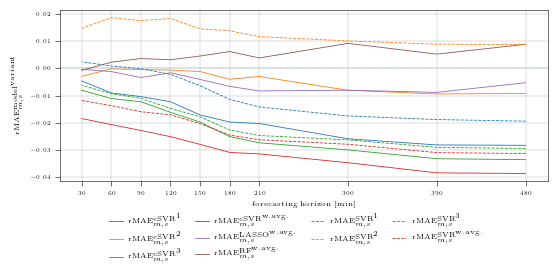

In [88]:
time_to_delivery = 0
fig, ax = plt.subplots(figsize=(Paper_width, 0.4 * Paper_width))

colors_list = list(mcolors.BASE_COLORS.keys())

# map of curve colors to use on the plot for each prediction
colors_map = {
    "prediction_1": "#1f77b4",
    "prediction_2": "#ff7f0e",
    "prediction_7": "#2ca02c",
    "prediction_32": "#d62728",
    "prediction_32lasso": "#9467bd",
    "prediction_32random_forest": "#8c564b",
    "prediction_plain_laplace_L2_1": "#1f77b4",
    "prediction_plain_laplace_L2_2": "#ff7f0e",
    "prediction_plain_laplace_L2_3": "#2ca02c",
}

# maps of latex names for each prediction key
latex_kernel_names_map = {
    "naive": """na\"{\i}ve""",
    "prediction_1": "$\mathrm{rMAE}^{\mathrm{cSVR}^1}_{m,s}$",
    "prediction_2": "$\mathrm{rMAE}^{\mathrm{cSVR}^2}_{m,s}$",
    "prediction_7": "$\mathrm{rMAE}^{\mathrm{cSVR}^3}_{m,s}$",
    "prediction_32": "$\mathrm{rMAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$",
    "prediction_32lasso": "$\mathrm{rMAE}^{\mathrm{LASSO}^{\mathrm{w. avg.}}}_{m,s}$",
    "prediction_32random_forest": "$\mathrm{rMAE}^{\mathrm{RF}^{\mathrm{w. avg.}}}_{m,s}$",
}
vanila_svr_latex_kernel_names_map = {
    "prediction_plain_laplace_L2_1": "$\mathrm{\mathrm{rMAE}}^{\mathrm{SVR}^1}_{m,s}$",
    "prediction_plain_laplace_L2_2": "$\mathrm{\mathrm{rMAE}}^{\mathrm{SVR}^2}_{m,s}$",
    "prediction_plain_laplace_L2_3": "$\mathrm{\mathrm{rMAE}}^{\mathrm{SVR}^3}_{m,s}$",
    "prediction_32": "$\mathrm{rMAE}^{\mathrm{SVR}^{\mathrm{w. avg.}}}_{m,s}$",
}

# models that performed worse so we do not add them to the MAE plot - only to the MAE table
worse_performing_models = {
    "predictionlasso": "$\hat{P}_{LASSO}^{1}$",
    "prediction_closelasso": "$\hat{P}_{LASSO}^{2}$",
    "prediction_exoglasso": "$\hat{P}_{LASSO}^{3}$",
    "predictionrandom_forest": "$\hat{P}_{RF}^{1}$",
    "prediction_closerandom_forest": "$\hat{P}_{RF}^{2}$",
    "prediction_exograndom_forest": "$\hat{P}_{RF}^{3}$",
}

avgs_table = pd.DataFrame()

for var_set in [11]:  # variables sets numbers to analyse
    # add the LASSO RF and cSVR results to the plot
    for forecast_technique in list(latex_kernel_names_map.keys()) + list(
        worse_performing_models.keys()
    ):
        results = {}
        counter_dict = {}

        for delivery in quantile_mae_results["avg"].keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
                if horizon in quantile_mae_results["avg"][delivery].keys():
                    if horizon not in results.keys():
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in quantile_mae_results["avg"][delivery][horizon].keys():
                        if (
                            len(quantile_mae_results["avg"][delivery][horizon][trad])
                            > 0
                        ):
                            trade_times.append(trad)
                    if len(trade_times) > 0:
                        trade_time = trade_times[time_to_delivery]

                        if (
                            len(quantile_mae_results["avg"][delivery][horizon][trade_time])
                            > 0
                            and "naive"
                            in quantile_mae_results["avg"][delivery][horizon][
                                trade_time
                            ].keys()
                        ):
                            results[horizon] += quantile_mae_results["avg"][delivery][
                                horizon
                            ][trade_time][forecast_technique]
                            counter_dict[horizon] += 1
                        else:
                            print(delivery)
                else:  # check whether a missing forecast for this horizon and delivery combination is expected (due to less than required len of trajectory history)
                    if (2 * (20 + horizon) + 60) / 60 < 8 + delivery * 15 / 60:
                        print(
                            f"Delivery {delivery} results are not available for horizon {horizon}"
                        )

        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
            if horizon == 30 and counter_dict[horizon] != 96:
                print(delivery, counter_dict[horizon], forecast_technique)

            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        if forecast_technique == "naive":
            naive_results = results_plot
        else:
            if forecast_technique in list(latex_kernel_names_map.keys()):
                ax.plot(
                    [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                    (np.array(results_plot) - np.array(naive_results))
                    / np.array(naive_results),
                    label=latex_kernel_names_map[forecast_technique],
                    lw=0.6,
                    color=colors_map[forecast_technique],
                )
                avgs_table[latex_kernel_names_map[forecast_technique]] = [
                    np.mean(
                        (np.array(results_plot) - np.array(naive_results))
                        / np.array(naive_results)
                    )
                ]
            else:
                avgs_table[worse_performing_models[forecast_technique]] = [
                    np.mean(
                        (np.array(results_plot) - np.array(naive_results))
                        / np.array(naive_results)
                    )
                ]

        if forecast_technique == "prediction_32lasso":
            lasso_avg_mae = results_plot

    # add the vanilla SVR results
    for forecast_technique in list(vanila_svr_latex_kernel_names_map.keys()):
        results = {}
        counter_dict = {}
        for delivery in quantile_mae_results_complete_svr["avg"].keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
                if horizon in quantile_mae_results_complete_svr["avg"][delivery].keys():
                    if horizon not in results.keys():
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in quantile_mae_results_complete_svr["avg"][delivery][
                        horizon
                    ].keys():
                        if (
                            len(
                                quantile_mae_results_complete_svr["avg"][delivery][
                                    horizon
                                ][trad]
                            )
                            > 0
                        ):
                            trade_times.append(trad)
                    trade_time = trade_times[time_to_delivery]
                    if (
                        len(
                            quantile_mae_results_complete_svr["avg"][delivery][horizon][
                                trade_time
                            ]
                        )
                        > 0
                        and "naive"
                        in quantile_mae_results_complete_svr["avg"][delivery][horizon][
                            trade_time
                        ].keys()
                    ):
                        results[horizon] += quantile_mae_results_complete_svr["avg"][
                            delivery
                        ][horizon][trade_time][forecast_technique]
                        counter_dict[horizon] += 1
                else:
                    if (2 * (20 + horizon) + 20) / 60 < 8:
                        print(
                            f"Delivery {delivery} results are not available for horizon {horizon}"
                        )

        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
            if horizon == 30 and counter_dict[horizon] != 96:
                print(delivery, counter_dict[horizon])

            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        ax.plot(
            [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
            (np.array(results_plot) - np.array(naive_results))
            / np.array(naive_results),
            label=vanila_svr_latex_kernel_names_map[forecast_technique],
            lw=0.6,
            color=colors_map[forecast_technique],
            ls="--",
        )
        avgs_table[vanila_svr_latex_kernel_names_map[forecast_technique]] = [
            np.mean(
                (np.array(results_plot) - np.array(naive_results))
                / np.array(naive_results)
            )
        ]

        if forecast_technique == "prediction_32lasso":
            lasso_avg_mae = results_plot

ax.axhline(0, ls="--", lw=0.2)
ax.set_xlabel("forecasting horizon [min]")
# ax.set_ylabel("avg. $(MAE_{model} - MAE_{naive})/MAE_{naive}$")
ax.set_ylabel("$\mathrm{rMAE}^{\mathrm{model}^\mathrm{variant}}_{m,s}$")
fig.legend(
    loc="outside lower center",
    ncol=4,
    frameon=False,
    fontsize=5,
    bbox_to_anchor=(0.5, -0.15),
)

ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30])
ax.grid(visible=True, linewidth=0.3)

fig.autofmt_xdate(rotation=0, ha="center")
# fig.subplots_adjust(bottom=0.3) # or whatever
plt.savefig("Paper_Figures/relative_MAE_all_models.pdf", bbox_inches="tight")

avgs_table.to_csv("Paper_Tables/relative_mae_table.csv")

Table 2:

In [89]:
avgs_table[
    [
        "$\mathrm{rMAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$",
        "$\mathrm{rMAE}^{\mathrm{SVR}^{\mathrm{w. avg.}}}_{m,s}$",
        "$\mathrm{rMAE}^{\mathrm{LASSO}^{\mathrm{w. avg.}}}_{m,s}$",
        "$\hat{P}_{LASSO}^{1}$",
        "$\hat{P}_{LASSO}^{2}$",
        "$\hat{P}_{LASSO}^{3}$",
        "$\mathrm{rMAE}^{\mathrm{RF}^{\mathrm{w. avg.}}}_{m,s}$",
        "$\hat{P}_{RF}^{1}$",
        "$\hat{P}_{RF}^{2}$",
        "$\hat{P}_{RF}^{3}$",
    ]
]

,"$\mathrm{rMAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$","$\mathrm{rMAE}^{\mathrm{SVR}^{\mathrm{w. avg.}}}_{m,s}$","$\mathrm{rMAE}^{\mathrm{LASSO}^{\mathrm{w. avg.}}}_{m,s}$",$\hat{P}_{LASSO}^{1}$,$\hat{P}_{LASSO}^{2}$,$\hat{P}_{LASSO}^{3}$,"$\mathrm{rMAE}^{\mathrm{RF}^{\mathrm{w. avg.}}}_{m,s}$",$\hat{P}_{RF}^{1}$,$\hat{P}_{RF}^{2}$,$\hat{P}_{RF}^{3}$
0,-0.028957,-0.022021,-0.004773,0.065175,0.021344,0.003351,0.004618,0.040961,0.049845,0.046169


## Fig 6

In [90]:
mae_results = {}
for delivery in deliveries:
    try:
        mae_results_delivery = pickle.load(
            open(
                f"Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/avg_mae_results_60_{delivery}.pickle",
                "rb",
            )
        )
        mae_results[delivery] = mae_results_delivery
    except Exception as err:
        print(f"Delivery {delivery} not found. Exception: {err}")

# prepare the relative MAE matrix
results_matrix = pd.DataFrame()
col_chosen = "prediction_32"

for d, delivery in enumerate(mae_results.keys()):
    for h, horizon in enumerate([480, 420, 360, 300, 240, 180, 150, 120, 90, 60, 30]):
        if horizon in mae_results[delivery].keys():
            # choose the trade time
            trade_times = []
            for trad in mae_results[delivery][horizon].keys():
                if len(mae_results[delivery][horizon][trad]) > 0:
                    trade_times.append(trad)
            if len(trade_times) > 0:
                trade_time = trade_times[0]
                if (
                    len(mae_results[delivery][horizon][trade_time]) > 0
                    and "naive" in mae_results[delivery][horizon][trade_time].keys()
                    and mae_results[delivery][horizon][trade_time]["naive"]
                ):
                    results_matrix.loc[horizon, delivery * 0.25] = (
                        mae_results[delivery][horizon][trade_time][col_chosen]
                        - mae_results[delivery][horizon][trade_time]["naive"]
                    ) / mae_results[delivery][horizon][trade_time]["naive"]
results_matrix = results_matrix.sort_index()

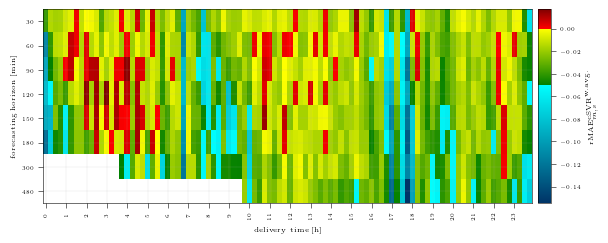

In [91]:
results_matrix = results_matrix.sort_index()

# prepare the custom colormap from red green and blue parts
partition = 1000
green_part = int(
    0.05
    / (-np.nanmin(results_matrix.to_numpy()) + np.nanmax(results_matrix.to_numpy()))
    * partition
)
red_part = int(
    np.nanmax(results_matrix.to_numpy())
    / (-np.nanmin(results_matrix.to_numpy()) + np.nanmax(results_matrix.to_numpy()))
    * partition
)
blue_part = int(partition - green_part - red_part)

red = np.concatenate(
    [
        np.zeros(blue_part),
        np.linspace(0, 1, green_part),
        np.linspace(1, 0.5, red_part + 1)[1:],
    ]
)
green = np.concatenate(
    [
        np.linspace(0.2, 1, blue_part),
        np.linspace(0.5, 1, green_part),
        np.zeros(red_part),
    ]
)
blue = np.concatenate(
    [np.linspace(1, 0.4, blue_part)[::-1], np.zeros(green_part), np.zeros(red_part)]
)
rgb_color_map = np.concatenate(
    [red.reshape(-1, 1), green.reshape(-1, 1), blue.reshape(-1, 1)], axis=1
)
rgb_color_map = mpl.colors.ListedColormap(rgb_color_map)

fig, ax = plt.subplots(figsize=(Image_width, 0.4 * Image_width))
im = ax.imshow(
    results_matrix.astype(float).values,
    cmap=rgb_color_map,
    vmin=np.nanmin(results_matrix.to_numpy()),
    vmax=np.nanmax(results_matrix.to_numpy()),
    aspect="auto",
)
ax.set_xticks(
    range(len(results_matrix.columns)),
    [int(i) for i in results_matrix.columns],
    rotation=90.0,
)
ax.set_yticks(range(len(results_matrix.index)), results_matrix.index)
ax.set_xlabel("delivery time [h]")
ax.set_ylabel("forecasting horizon [min]")
ax.xaxis.set_major_locator(mtick.MultipleLocator(4))
ax.grid(True, linewidth=0.1)
fig.subplots_adjust(right=0.9)
ax_pos = ax.get_position()
cbar_ax = fig.add_axes([ax_pos.x1 + 0.01, ax_pos.y0, 0.02, ax_pos.y1 - ax_pos.y0])
fig.colorbar(
    im,
    cax=cbar_ax,
    pad=0.5,
    shrink=0.4,
    label="$\mathrm{rMAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$",
)

plt.savefig(
    "Paper_Figures/3D_relative_mae_traded_60min_before_delivery.pdf",
    bbox_inches="tight",
)

## Fig 7

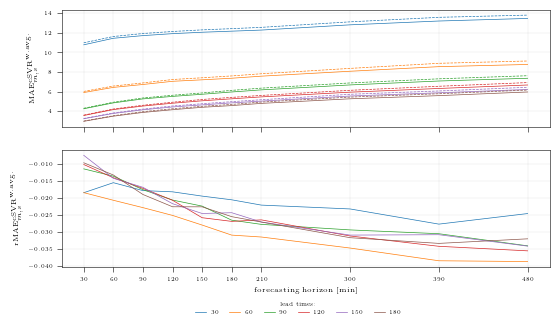

In [92]:
plot_matrix = []
ttd = 0

deliveries = np.arange(96)

for trade_vs_delivery_delta in [30, 60, 90, 120, 150, 180]:
    mae_results = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(open(f'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/avg_mae_results_{trade_vs_delivery_delta}_{delivery}.pickle', 'rb'))
            mae_results[delivery] = mae_results_delivery
        except:
            print(f'delivery {delivery}, delivery - trade {trade_vs_delivery_delta} not found')

    var_set = 11
    for forecast_technique in ['naive', 'prediction_32']:
        results = {}
        counter_dict = {}
        for delivery in mae_results.keys():
            for horizon in [480,390,300,210,180,150,120,90,60,30][::-1]:
                if horizon in mae_results[delivery].keys():
                    if horizon not in results.keys():
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in mae_results[delivery][horizon].keys():
                        if len(mae_results[delivery][horizon][trad]) > 0:
                            trade_times.append(trad)
                    if len(trade_times) > 0:
                        trade_time = trade_times[ttd]
                        if len(mae_results[delivery][horizon][trade_time]) > 0 and 'naive' in mae_results[delivery][horizon][trade_time].keys():
                            results[horizon] +=  mae_results[delivery][horizon][trade_time][forecast_technique]
                            counter_dict[horizon] += 1

        results_plot = []
        for horizon in [480,390,300,210,180,150,120,90,60,30][::-1]:

            if horizon not in counter_dict.keys():
                results_plot.append(np.nan)
            elif counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon]/counter_dict[horizon])

        if forecast_technique != 'naive':
            plot_matrix.append((np.array(results_plot) - np.array(naive_results)) / np.array(naive_results))
        else:
            naive_results = results_plot

plot_matrix_naive = []
plot_matrix_model = []

ttd = 0

deliveries = np.arange(96)

for trade_vs_delivery_delta in [30, 60, 90, 120, 150, 180]:
    mae_results = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(
                open(
                    f"Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/avg_mae_results_{trade_vs_delivery_delta}_{delivery}.pickle",
                    "rb",
                )
            )
            mae_results[delivery] = mae_results_delivery
        except Exception as err:
            print(
                f"Delivery {delivery} and lead time {trade_vs_delivery_delta} combination not found. Exception: {err}"
            )

    var_set = 11
    for forecast_technique in ["naive", "prediction_32"]:
        results = {}
        counter_dict = {}
        for delivery in mae_results.keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1]:
                if horizon in mae_results[delivery].keys():
                    if horizon not in results.keys():
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in mae_results[delivery][horizon].keys():
                        if len(mae_results[delivery][horizon][trad]) > 0:
                            trade_times.append(trad)
                    if len(trade_times) > 0:
                        trade_time = trade_times[ttd]
                        if (
                            len(mae_results[delivery][horizon][trade_time]) > 0
                            and "naive" in mae_results[delivery][horizon][trade_time].keys()
                        ):
                            results[horizon] += mae_results[delivery][horizon][trade_time][
                                forecast_technique
                            ]
                            counter_dict[horizon] += 1

        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1]:
            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        if forecast_technique != "naive":
            plot_matrix_model.append(np.array(results_plot))
        else:
            plot_matrix_naive.append(np.array(results_plot))

fig, axs = plt.subplots(nrows=2, figsize=(Paper_width, 0.6 * Paper_width))

labels = [30, 60, 90, 120, 150, 180]
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

ax = axs[0]
for horizon in range(np.shape(plot_matrix_model)[0]):
    ax.plot(
        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1],
        plot_matrix_model[horizon],
        lw=0.5,
        color=colors[horizon],
    )
    ax.plot(
        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1],
        plot_matrix_naive[horizon],
        "--",
        lw=0.5,
        color=colors[horizon],
    )

ax.set_xlabel("forecasting horizon [min]")
ax.set_ylabel("$\mathrm{MAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$")

ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1])
ax.grid(visible=True, linewidth=0.1)

ax = axs[1]
for horizon in range(np.shape(plot_matrix)[0]):
    ax.plot(
        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1],
        plot_matrix[horizon],
        lw=0.5,
        label=labels[horizon],
        color=colors[horizon],
    )

ax.set_xlabel("forecasting horizon [min]")
ax.set_ylabel(" $\mathrm{rMAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$")
fig.legend(
    loc="outside lower center",
    ncol=6,
    frameon=False,
    bbox_to_anchor=(0.5, 0.06),
    title="lead times:",
)

ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30][::-1])
ax.grid(visible=True, linewidth=0.1)

fig.autofmt_xdate(rotation=0, ha="center")
plt.savefig(
    "Paper_Figures/naive_and_best_model_MAE_and_relative_MAE.pdf",
    bbox_inches="tight",
)

## Fig A13

DM:
         0.00      0.25      0.50      0.75      1.00      1.25      1.50   \
30   0.412514  0.181877  0.356598  0.000158  0.021255  0.122949  0.037919   
60   0.221672  0.725820  0.551491  0.007598  0.045261  0.551141  0.150425   
90   0.009128  0.305751  0.598196  0.006145  0.032955  0.308787  0.786170   
120  0.001126  0.058653  0.308821  0.048148  0.165277  0.340252  0.768700   
150  0.000526  0.164176  0.296701  0.031557  0.013416  0.149419  0.258706   
180  0.000084  0.034972  0.400554  0.010552  0.083343  0.064006  0.038907   
300       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
480       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        1.75      2.00      2.25   ...     21.50     21.75     22.00  \
30   0.001437  0.587693  0.143273  ...  0.010061  0.023271  0.446693   
60   0.002179  0.503914  0.719464  ...  0.178097  0.277963  0.745693   
90   0.009855  0.572633  0.375208  ...  0.429553  0.010781  0.181803   
120  0.015714

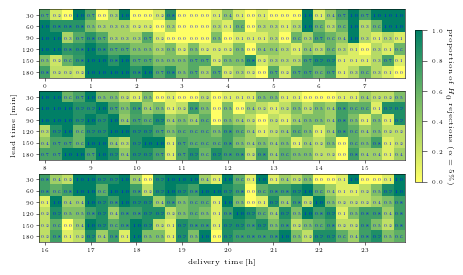

In [94]:
col_chosen = "prediction_32_DM_wrt_naive_pval"
import matplotlib as mpl
import matplotlib.ticker as mtick

aggregated_DM_results = []

for trade_horizon in range(30, 210, 30):
    mae_results = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(
                open(
                    f"Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/avg_mae_results_{trade_horizon}_{delivery}.pickle",
                    "rb",
                )
            )
            mae_results[delivery] = mae_results_delivery
        except:
            print(
                f"delivery {delivery}, delivery - trade {trade_vs_delivery_delta} not found"
            )
    results_matrix = pd.DataFrame()
    mae_results_matrix = pd.DataFrame()
    for d, delivery in enumerate(mae_results.keys()):
        for h, horizon in enumerate(
            [480, 420, 360, 300, 240, 180, 150, 120, 90, 60, 30]
        ):
            if horizon in mae_results[delivery].keys():
                # choose the trade time
                trade_times = []
                for trad in mae_results[delivery][horizon].keys():
                    if len(mae_results[delivery][horizon][trad]) > 0:
                        trade_times.append(trad)
                if len(trade_times) > 0:
                    trade_time = trade_times[0]
                    if len(mae_results[delivery][horizon][trade_time]) > 0:
                        results_matrix.loc[horizon, delivery * 0.25] = mae_results[
                            delivery
                        ][horizon][trade_time][col_chosen]
                        mae_results_matrix.loc[horizon, delivery * 0.25] = (
                            mae_results[delivery][horizon][trade_time]["prediction_32"]
                            - mae_results[delivery][horizon][trade_time]["naive"]
                        ) / mae_results[delivery][horizon][trade_time]["naive"]
    results_matrix = results_matrix.sort_index()
    mae_results_matrix = mae_results_matrix.sort_index()
    print("DM:\n", results_matrix)
    print("MAE:\n", mae_results_matrix)
    aggregated_DM_results.append(
        np.nansum(0.05 >= results_matrix.to_numpy(), axis=0)
        / np.sum(~np.isnan(results_matrix.to_numpy()), axis=0)
    )

# draw in three subplots
fig, axs = plt.subplots(nrows=3, figsize=(0.8 * Image_width, 0.8 * 0.6 * Image_width))
fig.subplots_adjust(hspace=0.2)
for i in range(3):
    dm_results_df = pd.DataFrame(
        columns=list(results_matrix.columns)[i * 32 : (i + 1) * 32],
        index=range(30, 210, 30),
        data=np.vstack(aggregated_DM_results)[:, i * 32 : (i + 1) * 32],
    )
    ax = axs[i]
    im = ax.imshow(
        dm_results_df.astype(float).values,
        cmap="summer_r",
        vmin=np.nanmin(dm_results_df.to_numpy()),
        vmax=np.nanmax(dm_results_df.to_numpy()),
        aspect="auto",
    )
    ax.set_xticks(
        range(len(dm_results_df.columns)), [int(i) for i in dm_results_df.columns]
    )
    ax.set_yticks(range(len(dm_results_df.index)), dm_results_df.index)
    ax.tick_params(axis="both", length=2, pad=2)
    if i == 2:
        ax.set_xlabel("delivery time [h]")
    if i == 1:
        ax.set_ylabel("lead time [min]")
    ax.xaxis.set_major_locator(mtick.MultipleLocator(4))
    # ax.grid(True)
    fig.subplots_adjust(right=0.9)

    # Loop over data dimensions and create text annotations.
    for j_idx, j in enumerate(dm_results_df.index):
        for k_idx, k in enumerate(list(dm_results_df.columns)):
            text = ax.text(
                k_idx,
                j_idx,
                dm_results_df.loc[j, k].round(1),
                ha="center",
                va="center",
                color="b",
                fontsize=3,
            )
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.31, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label(
    "proportion of $H_0$ rejections ($\\alpha = 5\%$)", rotation=270, labelpad=8
)
plt.savefig("Paper_Figures/all_horizons_DM_results.pdf", bbox_inches="tight")

dm_results_df_total = pd.DataFrame(
    columns=list(results_matrix.columns),
    index=range(30, 210, 30),
    data=np.vstack(aggregated_DM_results),
)

## Fig 8

DM:
         0.00      0.25      0.50      0.75      1.00      1.25      1.50   \
30   0.424112  0.447212  0.726188  0.000531  0.129822  0.204502  0.220653   
60   0.185141  0.867397  0.871895  0.043478  0.207669  0.890285  0.142403   
90   0.019223  0.835465  0.947794  0.019868  0.151988  0.532017  0.703500   
120  0.042970  0.045313  0.377758  0.214373  0.213457  0.839165  0.780671   
150  0.005458  0.293749  0.494451  0.038835  0.064318  0.196202  0.368339   
180  0.000358  0.012099  0.718522  0.033810  0.153990  0.092378  0.254482   
300       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
480       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

        1.75      2.00      2.25   ...     21.50     21.75     22.00  \
30   0.013265  0.675402  0.627963  ...  0.429551  0.163335  0.547814   
60   0.030001  0.648517  0.904673  ...  0.429815  0.658851  0.934935   
90   0.083632  0.228659  0.373565  ...  0.802602  0.185280  0.594052   
120  0.060506

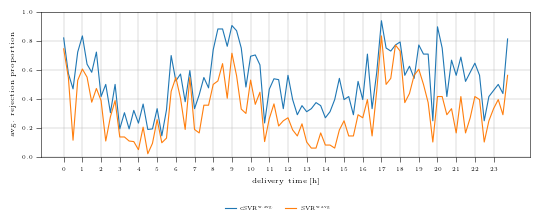

In [95]:
# gather the vanilla SVR results
aggregated_DM_results = []

for trade_horizon in range(30, 210, 30):
    mae_results = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(
                open(
                    f"Forecasting/RESULTS/MAE_ANALYSIS_COMPLETE_SVR/avg_mae_results_{trade_horizon}_{delivery}.pickle",
                    "rb",
                )
            )
            mae_results[delivery] = mae_results_delivery
        except:
            print(f"mae_results_{trade_horizon}_{delivery}.pickle not found")
    results_matrix = pd.DataFrame()
    mae_results_matrix = pd.DataFrame()
    for d, delivery in enumerate(mae_results.keys()):
        for h, horizon in enumerate(
            [480, 420, 360, 300, 240, 180, 150, 120, 90, 60, 30]
        ):
            if horizon in mae_results[delivery].keys():
                # choose the trade time
                trade_times = []
                for trad in mae_results[delivery][horizon].keys():
                    if len(mae_results[delivery][horizon][trad]) > 0:
                        trade_times.append(trad)
                trade_time = trade_times[0]
                if len(mae_results[delivery][horizon][trade_time]) > 0:
                    results_matrix.loc[horizon, delivery * 0.25] = mae_results[
                        delivery
                    ][horizon][trade_time][col_chosen]
                    mae_results_matrix.loc[horizon, delivery * 0.25] = (
                        mae_results[delivery][horizon][trade_time]["prediction_32"]
                        - mae_results[delivery][horizon][trade_time]["naive"]
                    ) / mae_results[delivery][horizon][trade_time]["naive"]
    results_matrix = results_matrix.sort_index()
    mae_results_matrix = mae_results_matrix.sort_index()
    print("DM:\n", results_matrix)
    print("MAE:\n", mae_results_matrix)
    aggregated_DM_results.append(
        np.nansum(0.05 >= results_matrix.to_numpy(), axis=0)
        / np.sum(~np.isnan(results_matrix.to_numpy()), axis=0)
    )

vanilla_dm_results_df_total = pd.DataFrame(
    columns=list(results_matrix.columns),
    index=range(30, 210, 30),
    data=np.vstack(aggregated_DM_results),
)

fig, ax = plt.subplots(figsize=(Image_width, 0.3 * Image_width))
ax.plot(
    dm_results_df_total.columns,
    dm_results_df_total.mean().values,
    lw=0.8,
    label="$\mathrm{cSVR}^{\mathrm{w. avg.}}$",
)
ax.plot(
    vanilla_dm_results_df_total.columns,
    vanilla_dm_results_df_total.mean().values,
    lw=0.8,
    label="$\mathrm{SVR}^{\mathrm{w. avg.}}$",
)
ax.set_xticks(range(24))
ax.grid(visible=True, linewidth=0.3)
fig.legend(
    loc="outside lower center", ncol=2, frameon=False, bbox_to_anchor=(0.5, -0.2)
)
# ax.axhline(0.5, ls='--', lw=0.4, color='black')
ax.set_xlabel("delivery time [h]")
ax.set_ylabel("avg. rejection proportion")
ax.set_ylim(0, 1)
plt.savefig(
    "Paper_Figures/vanilla_SVR_and_cSVR_avg_rejections_proportion.pdf",
    bbox_inches="tight",
)

## Fig A.9

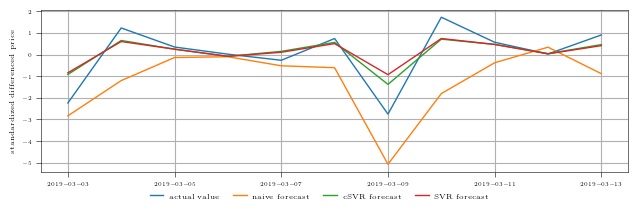

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df_analysis = pd.read_csv(
    "Forecasting/TEST_INSAMPLE/0.00525500182665678_2019-12-09 00;00;00_insample_fit_test.csv",
    index_col=0,
)

# Define last date and number of rows
last_date = pd.to_datetime("2019-12-08")
num_rows = df_analysis.shape[0]

# Create datetime index (daily frequency backwards from last_date)
date_index = pd.date_range(end=last_date, periods=num_rows, freq="D")
df_analysis.index = date_index

# Select only the columns you want
cols_to_plot = ["act", "naive", "7", "plain_laplace_L2_3"]
names_of_cols = [
    "actual value",
    "naive forecast",
    "cSVR forecast",
    "SVR forecast",
]
df_plot = df_analysis[cols_to_plot]

# Select only the range of interest (rows 115–125)
df_plot = df_plot.iloc[115:126]  # 115 to 125 inclusive

# Plot with Matplotlib
fig, ax = plt.subplots(figsize=(Paper_width, 0.3 * Paper_width))

# Plot using ax.plot
for col_idx, col in enumerate(df_plot.columns):
    ax.plot(df_plot.index, df_plot[col], label=names_of_cols[col_idx], linewidth=1)

# Set titles and labels
ax.set_ylabel("standardized differenced price")

# Legend outside lower center
fig.legend(
    loc="outside lower center",
    ncol=4,
    frameon=False,
    bbox_to_anchor=(0.5, -0.07),
    fontsize=5,
)

# Grid
ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig("Paper_Figures/fit_example.pdf", bbox_inches="tight")

# Fig A.10

TODO change to use the preprocessed data

In [ ]:
# DA quarterly prices
DA_qtrly = pd.read_csv(
    "Data/Day-Ahead-Quarterly-Data/DA_prices_qtrly_2018_2020_preprocessed.csv",
    na_values=["n/e"],
)
DA_qtrly["Datetime from"] = pd.to_datetime(
    DA_qtrly["Datetime from"], format="%d.%m.%Y %H:%M"
)
DA_qtrly = DA_qtrly[DA_qtrly["Datetime from"] > datetime(year=2018, month=11, day=2)]
DA_qtrly["Day-ahead Price [EUR/MWh]"] = DA_qtrly["Day-ahead Price [EUR/MWh]"].fillna(
    DA_qtrly["Day-ahead Price [EUR/MWh]"].rolling(4 + 1, min_periods=1).mean()
)
DA_qtrly["Day-ahead Price [EUR/MWh]"] = DA_qtrly["Day-ahead Price [EUR/MWh]"].fillna(
    method="ffill"
)

# load Load
Load = pd.read_csv("Data/Load/Load_2018-2020.csv", parse_dates=["Time from"])
Load = Load[Load["Time from"] > datetime(year=2018, month=11, day=2)]
Load[["Actual", "Forecast"]] = Load[["Actual", "Forecast"]].fillna(
    Load[["Actual", "Forecast"]].rolling(4 + 1, min_periods=1).mean()
)

# res generation
gen = pd.read_csv("Data/Generation/Generation_2018-2020.csv", parse_dates=["Time from"])
gen = gen[gen["Time from"] > datetime(year=2018, month=11, day=2)]
gen[["SPV", "W"]] = gen[["SPV", "W"]].fillna(
    gen[["SPV", "W"]].rolling(4 + 1, min_periods=1).mean()
)

# cross border trade with FR
ge_fr = pd.read_csv(
    "Data/Crossborder/crossborder_ge_fr_2018-2020.csv", parse_dates=["Time from"]
)
ge_fr = ge_fr[ge_fr["Time from"] > datetime(year=2018, month=11, day=2)]
ge_fr["DE > FR"] = ge_fr["DE > FR"].fillna(
    ge_fr["DE > FR"].rolling(4 + 1, min_periods=1).mean()
)

ID_qtrly = pd.read_csv(
    "Data/ID_auction_preprocessed/ID_auction_price_2018-2020_preproc.csv",
    index_col=0,
    parse_dates=True,
)
ID_qtrly = ID_qtrly[ID_qtrly.index >= datetime(year=2018, month=10, day=31)]

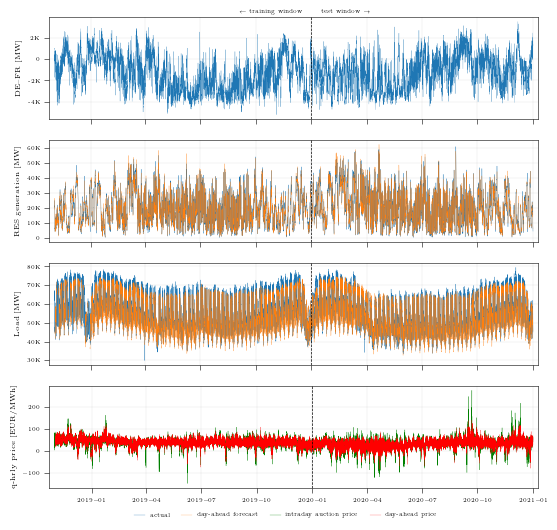

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

f = lambda x, pos: f"{x / 10**3:,.0f}K" if x != 0 else 0
# Define the date for the vertical line
split_date = pd.to_datetime("2020-01-01 00:00:00")

# Create subplots
fig, axs = plt.subplots(nrows=4, figsize=(Paper_width, 1.1 * Paper_width))

# Plot the first subplot
ax = axs[0]
ax.plot(ge_fr["Time from"], ge_fr["DE > FR"], lw=0.15)
ax.set_ylabel(r"DE--FR [MW]")
ax.grid(visible=True, linewidth=0.1)
ax.axvline(
    split_date, color="black", linestyle="--", linewidth=0.5
)  # Vertical line at midnight 01-01-2020
ax.text(
    split_date - timedelta(days=15),
    ax.get_ylim()[1] * 1.05,
    r"$\leftarrow$ training window",
    ha="right",
    va="bottom",
)
ax.text(
    split_date + timedelta(days=15),
    ax.get_ylim()[1] * 1.05,
    r"test window $\rightarrow$",
    ha="left",
    va="bottom",
)
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)

# Plot the second subplot
ax = axs[1]
ax.plot(Load["Time from"], gen["SPV"] + gen["W"], lw=0.2, label="actual")
ax.plot(
    Load["Time from"], gen["SPV DA"] + gen["W DA"], lw=0.15, label="day-ahead forecast"
)
ax.grid(visible=True, linewidth=0.1)
ax.set_ylabel("RES generation [MW]")
ax.axvline(
    split_date, color="black", linestyle="--", linewidth=0.5
)  # Vertical line at midnight 01-01-2020
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)

# Plot the third subplot
ax = axs[2]
ax.plot(Load["Time from"], Load["Actual"], lw=0.2)
ax.plot(Load["Time from"], Load["Forecast"], lw=0.15)
ax.grid(visible=True, linewidth=0.1)
ax.set_ylabel("Load [MW]")
ax.axvline(
    split_date, color="black", linestyle="--", linewidth=0.5
)  # Vertical line at midnight 01-01-2020
ax.yaxis.set_major_formatter(FuncFormatter(f))
ax.margins(x=0.01)

# Plot the fourth subplot
ax = axs[3]
ax.plot(
    ID_qtrly.index,
    ID_qtrly.price,
    lw=0.2,
    label="intraday auction price",
    color="green",
)
ax.plot(
    DA_qtrly["Datetime from"],
    DA_qtrly["Day-ahead Price [EUR/MWh]"],
    lw=0.15,
    label="day-ahead price",
    color="red",
)
ax.set_ylabel("q-hrly price [EUR/MWh]")
ax.grid(visible=True, linewidth=0.1)
ax.axvline(
    split_date, color="black", linestyle="--", linewidth=0.5
)  # Vertical line at midnight 01-01-2020
ax.margins(x=0.01)

# Adjust and save the figure
fig.legend(
    loc="outside lower center", ncol=4, frameon=False, bbox_to_anchor=(0.5, 0.15)
)
fig.autofmt_xdate(rotation=0, ha="center")

plt.savefig("Paper_Figures/exogenous_variables.pdf", bbox_inches="tight")

## Fig A.11

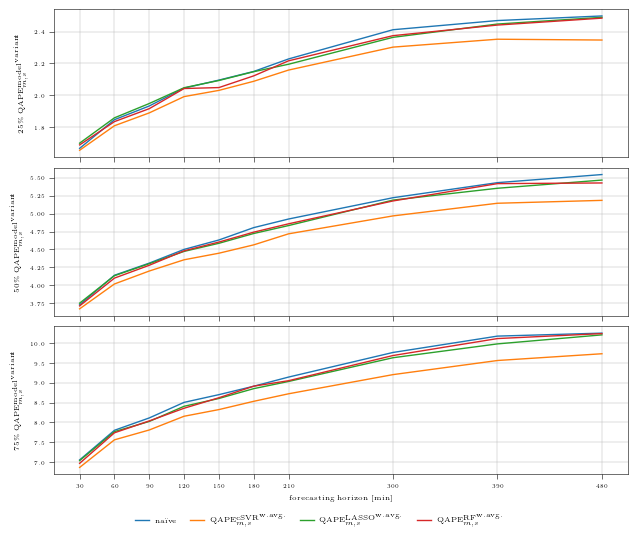

In [ ]:
ttd = 0

clean_kernel_names_map = {
    "naive": r"na\"{\i}ve",
    "prediction_32": "$\mathrm{QAPE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$",
    "prediction_32lasso": "$\mathrm{QAPE}^{\mathrm{LASSO}^{\mathrm{w. avg.}}}_{m,s}$",
    "prediction_32random_forest": "$\mathrm{QAPE}^{\mathrm{RF}^{\mathrm{w. avg.}}}_{m,s}$",
}

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, axs = plt.subplots(nrows=3, figsize=(Paper_width, 0.8 * Paper_width))

for measure_idx, measure_type in enumerate(
    ["quantile_0.25", "quantile_0.5", "quantile_0.75"]
):
    ax = axs[measure_idx]
    for idx, forecast_technique in enumerate(list(clean_kernel_names_map.keys())):
        results = {}
        counter_dict = {}
        for delivery in quantile_mae_results[measure_type].keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
                if horizon in quantile_mae_results[measure_type][delivery].keys():
                    if not (horizon in results.keys()):
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in quantile_mae_results[measure_type][delivery][
                        horizon
                    ].keys():
                        if (
                            len(
                                quantile_mae_results[measure_type][delivery][horizon][
                                    trad
                                ]
                            )
                            > 0
                        ):
                            trade_times.append(trad)
                    trade_time = trade_times[ttd]
                    if (
                        len(
                            quantile_mae_results[measure_type][delivery][horizon][
                                trade_time
                            ]
                        )
                        > 0
                        and "naive"
                        in quantile_mae_results[measure_type][delivery][horizon][
                            trade_time
                        ].keys()
                    ):
                        results[horizon] += quantile_mae_results[measure_type][
                            delivery
                        ][horizon][trade_time][forecast_technique]
                        counter_dict[horizon] += 1

        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        if forecast_technique in list(clean_kernel_names_map.keys()):
            if measure_type == "quantile_0.5":
                ax.plot(
                    [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                    np.array(results_plot),
                    label=clean_kernel_names_map[forecast_technique],
                    lw=1,
                    color=colors[idx],
                )
            else:
                if measure_type == "quantile_0.25":
                    ax.plot(
                        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                        np.array(results_plot),
                        lw=1,
                        color=colors[idx],
                    )
                elif measure_type == "quantile_0.75":
                    ax.plot(
                        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                        np.array(results_plot),
                        lw=1,
                        color=colors[idx],
                    )
        ax.grid(visible=True, linewidth=0.3)
        ax.set_ylabel(
            rf"{int(float(measure_type.split('_')[1]) * 100)}\% "
            + "$\mathrm{QAPE}^{\mathrm{model}^\mathrm{variant}}_{m,s}$"
        )
        ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30])

ax.set_xlabel("forecasting horizon [min]")
# ax.set_ylabel("avg. $(MAE_{model} - MAE_{naive})/MAE_{naive}$")
fig.legend(
    loc="outside lower center",
    ncol=5,
    frameon=False,
    bbox_to_anchor=(0.5, -0.05),
    fontsize=5,
)


fig.autofmt_xdate(rotation=0, ha="center")

plt.tight_layout()
plt.savefig(
    "Paper_Figures/QUANTILE_RANGES_relative_MAE_all_models.pdf", bbox_inches="tight"
)

## Fig A.12

In [86]:
# load the percentile results
deliveries = np.arange(96)

surprise_mae_results = {}

for measure_type in ["0.25", "0.75"]:
    surprise_mae_results[measure_type] = {}
    for delivery in deliveries:
        try:
            mae_results_delivery = pickle.load(
                open(
                    f"Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/{measure_type}_relative_surprise_avg_mae_results_60_{delivery}.pickle",
                    "rb",
                )
            )
            surprise_mae_results[measure_type][delivery] = mae_results_delivery
        except Exception as err:
            print(err)
            print(f"delivery {delivery} not found")

[Errno 2] No such file or directory: 'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/0.25_relative_surprise_avg_mae_results_60_0.pickle'
delivery 0 not found
[Errno 2] No such file or directory: 'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/0.25_relative_surprise_avg_mae_results_60_1.pickle'
delivery 1 not found
[Errno 2] No such file or directory: 'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/0.25_relative_surprise_avg_mae_results_60_2.pickle'
delivery 2 not found
[Errno 2] No such file or directory: 'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/0.25_relative_surprise_avg_mae_results_60_3.pickle'
delivery 3 not found
[Errno 2] No such file or directory: 'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/0.25_relative_surprise_avg_mae_results_60_4.pickle'
delivery 4 not found
[Errno 2] No such file or directory: 'Forecasting/RESULTS/cSVR_SVR_LASSO_RF_MAE_ANALYSIS/0.25_relative_surprise_avg_mae_results_60_5.pickle'
delivery 5 not found
[Errno 2] No such file or di

95
naive
95
prediction_32
95
prediction_32lasso
95
prediction_32random_forest
95
prediction_33
95
prediction_34
95
prediction_35
95
predictionlasso
95
prediction_closelasso
95
prediction_exoglasso
95
predictionrandom_forest
95
prediction_closerandom_forest
95
prediction_exograndom_forest
95
naive
95
prediction_32
95
prediction_32lasso
95
prediction_32random_forest
95
prediction_33
95
prediction_34
95
prediction_35
95
predictionlasso
95
prediction_closelasso
95
prediction_exoglasso
95
predictionrandom_forest
95
prediction_closerandom_forest
95
prediction_exograndom_forest


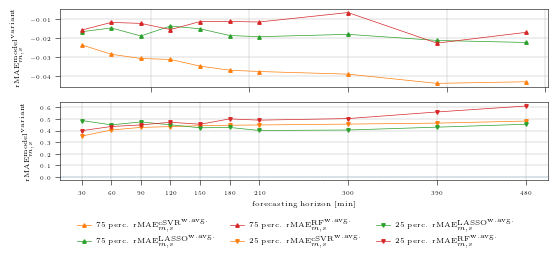

In [ ]:
ttd = 0
clean_kernel_names_map = {
    "naive": r"na\"{\i}ve",
    "prediction_32": "$\mathrm{rMAE}^{\mathrm{cSVR}^{\mathrm{w. avg.}}}_{m,s}$",
    "prediction_32lasso": "$\mathrm{rMAE}^{\mathrm{LASSO}^{\mathrm{w. avg.}}}_{m,s}$",
    "prediction_32random_forest": "$\mathrm{rMAE}^{\mathrm{RF}^{\mathrm{w. avg.}}}_{m,s}$",
}

worse_performing_models = {
    "prediction_33": "intel avg. 1,2,7 win 14",
    "prediction_34": "intel avg. 1,2,7 win 21",
    "prediction_35": "intel avg. 1,2,7 win 28",
    "predictionlasso": "$\hat{P}_{LASSO}^{1}$",
    "prediction_closelasso": "$\hat{P}_{LASSO}^{2}$",
    "prediction_exoglasso": "$\hat{P}_{LASSO}^{3}$",
    "predictionrandom_forest": "$\hat{P}_{RF}^{1}$",
    "prediction_closerandom_forest": "$\hat{P}_{RF}^{2}$",
    "prediction_exograndom_forest": "$\hat{P}_{RF}^{3}$",
}

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, axs = plt.subplots(nrows=2, figsize=(Paper_width, 0.4 * Paper_width))

for measure_idx, measure_type in enumerate(["0.75", "0.25"]):
    ax = axs[measure_idx]
    for idx, forecast_technique in enumerate(
        list(clean_kernel_names_map.keys()) + list(worse_performing_models.keys())
    ):
        results = {}
        counter_dict = {}
        for delivery in surprise_mae_results[measure_type].keys():
            for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
                if horizon in surprise_mae_results[measure_type][delivery].keys():
                    if not (horizon in results.keys()):
                        results[horizon] = 0
                        counter_dict[horizon] = 0
                    # choose the trade time
                    trade_times = []
                    for trad in surprise_mae_results[measure_type][delivery][
                        horizon
                    ].keys():
                        if (
                            len(
                                surprise_mae_results[measure_type][delivery][horizon][
                                    trad
                                ]
                            )
                            > 0
                        ):
                            trade_times.append(trad)
                    trade_time = trade_times[ttd]
                    if (
                        len(
                            surprise_mae_results[measure_type][delivery][horizon][
                                trade_time
                            ]
                        )
                        > 0
                        and "naive"
                        in surprise_mae_results[measure_type][delivery][horizon][
                            trade_time
                        ].keys()
                    ):
                        results[horizon] += surprise_mae_results[measure_type][
                            delivery
                        ][horizon][trade_time][forecast_technique]
                        counter_dict[horizon] += 1

        results_plot = []
        for horizon in [480, 390, 300, 210, 180, 150, 120, 90, 60, 30]:
            if horizon == 30 and counter_dict[horizon] != 96:
                print(delivery)

            if counter_dict[horizon] == 0:
                results_plot.append(np.nan)
            else:
                results_plot.append(results[horizon] / counter_dict[horizon])

        print(forecast_technique)
        if forecast_technique != "naive":
            if forecast_technique in list(clean_kernel_names_map.keys()):
                if measure_type == "0.25":
                    ax.plot(
                        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                        (np.array(results_plot) - np.array(naive_results))
                        / np.array(naive_results),
                        lw=0.5,
                        marker="v",
                        ms=2.5,
                        color=colors[idx],
                        label="25 perc. " + clean_kernel_names_map[forecast_technique],
                    )
                elif measure_type == "0.75":
                    ax.plot(
                        [480, 390, 300, 210, 180, 150, 120, 90, 60, 30],
                        (np.array(results_plot) - np.array(naive_results))
                        / np.array(naive_results),
                        lw=0.5,
                        marker="^",
                        ms=2.5,
                        color=colors[idx],
                        label="75 perc. " + clean_kernel_names_map[forecast_technique],
                    )
        else:
            naive_results = results_plot

        ax.set_ylabel("$\mathrm{rMAE}^{\mathrm{model}^\mathrm{variant}}_{m,s}$")
        ax.grid(visible=True, linewidth=0.3)

ax.axhline(0, ls="--", lw=0.2)
ax.set_xlabel("forecasting horizon [min]")
fig.legend(
    loc="outside lower center",
    ncol=3,
    frameon=False,
    bbox_to_anchor=(0.5, -0.09),
    fontsize=5,
)

ax.set_xticks([480, 390, 300, 210, 180, 150, 120, 90, 60, 30])

fig.autofmt_xdate(rotation=0, ha="center")
plt.savefig(
    "Paper_Figures/EXTREME_SURPRISE_relative_MAE_all_models.pdf", bbox_inches="tight"
)

# Additional analysis that is not part of the paper (but may be helpful in understanding the dataset)

## Analysis of cross-border trades

In [ ]:
plain_data = pd.read_csv("Data/Transactions/concatenated_table.csv")
print(
    "Bought from: \n",
    plain_data.groupby("Area Buy")["Volume (MW)"].sum().sort_values()
    / np.sum(plain_data.groupby("Area Buy")["Volume (MW)"].sum().sort_values()),
)
print(
    "Sold to: \n",
    plain_data.groupby("Market Area Sell")["Volume (MW)"].sum().sort_values()
    / np.sum(plain_data.groupby("Market Area Sell")["Volume (MW)"].sum()),
)

Bought from:  Area Buy
NO4     1.743767e-07
NO3     3.904412e-07
NO1     1.988810e-06
NO5     2.536343e-06
NO2     2.690892e-06
SE2     1.231364e-05
SE4     2.249358e-05
SE1     2.448494e-05
FI      4.429169e-05
SE3     9.116396e-05
DK2     5.686451e-04
DK1     1.000222e-03
BE      7.283260e-03
NL      1.719334e-02
AT      1.780483e-02
FR      2.701628e-02
XBID    7.585446e-02
DE      8.530764e-01
Name: Volume (MW), dtype: float64
Sold to:  Market Area Sell
NO4     1.418400e-07
NO3     8.764592e-07
SE2     6.401609e-06
NO5     9.155542e-06
NO1     1.243616e-05
SE1     2.055968e-05
SE4     2.186420e-05
NO2     4.262164e-05
FI      8.235310e-05
SE3     2.019410e-04
DK2     5.484855e-04
DK1     1.023960e-03
BE      7.387143e-03
NL      1.468460e-02
AT      2.276870e-02
FR      3.245621e-02
XBID    8.139322e-02
DE      8.393393e-01
Name: Volume (MW), dtype: float64


## Prices and volume exploratory analysis

In [ ]:
df_copy = pd.read_csv("Data/preprocessed_dataset.csv", date_format="%s")
df_copy["Datetime offer time"] = pd.to_datetime(df_copy["Datetime offer time"])
df_copy["Datetime from"] = pd.to_datetime(df_copy["Datetime from"])

Statistics for trades <3h before the delivery

In [ ]:
less_3h = df_copy[
    df_copy["Datetime from"] - df_copy["Datetime offer time"] < timedelta(hours=3)
][["Price (EUR)", "Volume (MW)"]].describe()
less_3h.to_csv("Paper_Tables/less_than_3h_stats.csv")
less_3h

,Price (EUR),Volume (MW)
count,3.359668e+07,3.359668e+07
mean,3.618424e+01,1.863402e+00
std,2.804542e+01,2.361050e+00
min,-5.999000e+03,1.000000e-01
25%,2.500000e+01,4.000000e-01
50%,3.600000e+01,1.000000e+00
75%,4.739000e+01,2.600000e+00
max,7.999000e+03,3.010000e+02


Statistics for trades >3h before the delivery

In [ ]:
more_3h = df_copy[
    df_copy["Datetime from"] - df_copy["Datetime offer time"] > timedelta(hours=3)
][["Price (EUR)", "Volume (MW)"]].describe()
more_3h.to_csv("Paper_Tables/more_than_3h_stats.csv")
more_3h

,Price (EUR),Volume (MW)
count,8.744774e+06,8.744774e+06
mean,3.649961e+01,1.578525e+00
std,2.291518e+01,1.845516e+00
min,-5.694000e+02,1.000000e-01
25%,2.573000e+01,4.000000e-01
50%,3.670000e+01,1.000000e+00
75%,4.795000e+01,2.100000e+00
max,1.244690e+03,3.093000e+02


Ratio of [statistics of price and volume <3h before delivery] and [statistics of price and volume >3h before delivery]

In [ ]:
df_copy[df_copy["Datetime from"] - df_copy["Datetime offer time"] < timedelta(hours=3)][
    ["Price (EUR)", "Volume (MW)"]
].describe() / df_copy[
    df_copy["Datetime from"] - df_copy["Datetime offer time"] > timedelta(hours=3)
][["Price (EUR)", "Volume (MW)"]].describe()

,Price (EUR),Volume (MW)
count,3.841915,3.841915
mean,0.991360,1.180470
std,1.223879,1.279344
min,10.535652,1.000000
25%,0.971628,1.000000
50%,0.980926,1.000000
75%,0.988321,1.238095
max,6.426500,0.973165


# 3D price and volume analysis

C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


-20.5836012942613 95.00917857142856


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


16.97177070266604 68.70666461038962


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


1.8357566137566126 63.072529075091566


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:38: RuntimeWarning: Mean of empty slice
  print(np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2504397464.py:40: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


-21.771473183784533 51.947702020202016


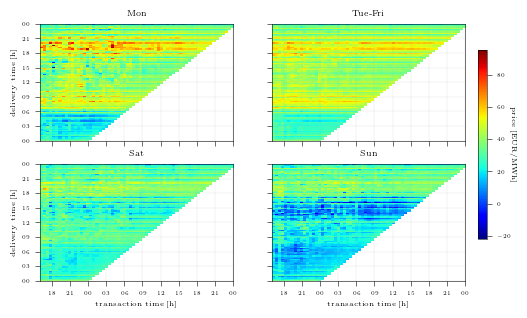

In [ ]:
fig, axs = plt.subplots(
    ncols=2, nrows=2, figsize=(Paper_width, 0.6 * Paper_width), sharex=True, sharey=True
)

titles = ["Mon", "Tue-Fri", "Sat", "Sun"]

collect_matrices = []  # comment if You run 2nd time and set False in line 7

for idx, wday, ax in zip(range(4), [[0], [1, 2, 3, 4], [5], [6]], axs.flat):
    if True:  # change to false if You run cell 2nd time
        df_copy_0 = df_copy[
            ["Datetime from", "Datetime offer time", "Price (EUR)"]
        ].copy(deep=True)
        df_copy_0 = df_copy_0[
            (
                df_copy_0["Datetime from"].dt.date
                != df_copy_0["Datetime offer time"].dt.date
            )
            & (df_copy_0["Datetime from"].dt.weekday.isin(wday))
        ]
        df_copy_0["Datetime offer time"] = pd.to_datetime(
            df_copy_0["Datetime offer time"]
        ).dt.time
        df_copy_0["Datetime from"] = pd.to_datetime(df_copy_0["Datetime from"]).dt.time

        price_avged = df_copy_0.groupby(
            ["Datetime from", "Datetime offer time"]
        ).mean()["Price (EUR)"]

        total_matrix_0 = np.zeros((96, 24 * 60)) * np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_0[
                    i,
                    (
                        datetime.combine(date.today(), g[0])
                        - datetime.today().replace(
                            hour=0, minute=0, second=0, microsecond=0
                        )
                    ).seconds
                    // 60,
                ] = g[1].to_numpy()[0]
        df_copy_1 = df_copy[
            ["Datetime from", "Datetime offer time", "Price (EUR)"]
        ].copy(deep=True)
        df_copy_1 = df_copy_1[
            (
                df_copy_1["Datetime from"].dt.date
                == df_copy_1["Datetime offer time"].dt.date
            )
            & (df_copy_1["Datetime from"].dt.weekday.isin(wday))
        ]
        df_copy_1["Datetime offer time"] = pd.to_datetime(
            df_copy_1["Datetime offer time"]
        ).dt.time
        df_copy_1["Datetime from"] = pd.to_datetime(df_copy_1["Datetime from"]).dt.time

        price_avged = df_copy_1.groupby(
            ["Datetime from", "Datetime offer time"]
        ).mean()["Price (EUR)"]

        total_matrix_1 = np.zeros((96, 24 * 60)) * np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_1[
                    i + 1,
                    (
                        datetime.combine(date.today(), g[0])
                        - datetime.today().replace(
                            hour=0, minute=0, second=0, microsecond=0
                        )
                    ).seconds
                    // 60,
                ] = g[1].to_numpy()[0]

        total_matrix = np.hstack((total_matrix_0, total_matrix_1))

        collect_matrices.append(total_matrix)
    else:
        total_matrix = collect_matrices[idx]

    print(
        np.nanmin(
            np.nanmean(total_matrix.reshape((96, 1440 // 30 * 2, 30)), axis=2)[:, 32:-1]
        ),
        np.nanmax(
            np.nanmean(total_matrix.reshape((96, 1440 // 30 * 2, 30)), axis=2)[:, 32:-1]
        ),
    )

    im = ax.imshow(
        np.nanmean(total_matrix.reshape((96, 1440 // 30 * 2, 30)), axis=2)[:, 32:-1],
        origin="lower",
        aspect="auto",
        cmap="jet",
        extent=[
            datetime.today().replace(hour=16, minute=0, second=0, microsecond=0),
            date.today() + timedelta(days=2),
            date.today() + timedelta(days=1),
            date.today() + timedelta(days=2) - timedelta(minutes=15),
        ],
        interpolation="none",
        vmin=-22,
        vmax=95,
    )

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    ax.yaxis_date()
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H"))

    # cbar = fig.colorbar(im)
    # cbar.set_label('price [EUR/MWh]', rotation=270, labelpad=12)
    if idx > 1:
        ax.set_xlabel("transaction time [h]")
    if idx in [0, 2]:
        ax.set_ylabel("delivery time [h]")
    ax.grid(visible=True, linewidth=0.1)
    ax.set_title(titles[idx])
fig.autofmt_xdate(rotation=0, ha="center")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.31, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("price [EUR/MWh]", rotation=270, labelpad=5)

plt.savefig("Paper_Figures/mon_aggtuefri_sat_sun_3D_prices.pdf", bbox_inches="tight")

21146.0 8.0
21328.75 14.5
19748.0 8.0
19175.0 9.0


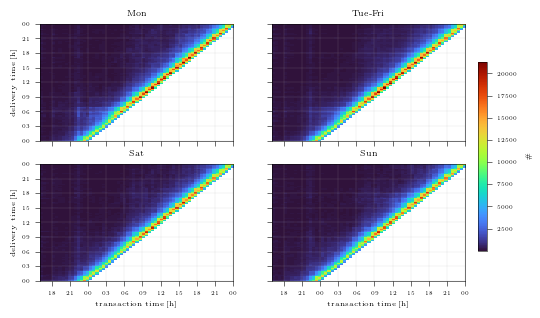

In [ ]:
fig, axs = plt.subplots(
    ncols=2, nrows=2, figsize=(Paper_width, 0.6 * Paper_width), sharex=True, sharey=True
)

titles = ["Mon", "Tue-Fri", "Sat", "Sun"]

for idx, wday, ax in zip(range(4), [[0], [1, 2, 3, 4], [5], [6]], axs.flat):
    df_copy_0 = df_copy[["Datetime from", "Datetime offer time", "Price (EUR)"]].copy(
        deep=True
    )
    df_copy_0 = df_copy_0[
        (df_copy_0["Datetime from"].dt.date != df_copy_0["Datetime offer time"].dt.date)
        & (df_copy_0["Datetime from"].dt.weekday.isin(wday))
    ]
    df_copy_0["Datetime offer time"] = pd.to_datetime(
        df_copy_0["Datetime offer time"]
    ).dt.time
    df_copy_0["Datetime from"] = pd.to_datetime(df_copy_0["Datetime from"]).dt.time

    price_avged = df_copy_0.groupby(["Datetime from", "Datetime offer time"]).count()[
        "Price (EUR)"
    ]

    total_matrix_0 = np.zeros((96, 24 * 60)) * np.nan
    for i, group in enumerate(price_avged.groupby(level=0)):
        for j, g in enumerate(group[1].groupby(level=1)):
            total_matrix_0[
                i,
                (
                    datetime.combine(date.today(), g[0])
                    - datetime.today().replace(
                        hour=0, minute=0, second=0, microsecond=0
                    )
                ).seconds
                // 60,
            ] = g[1].to_numpy()[0]
    df_copy_1 = df_copy[["Datetime from", "Datetime offer time", "Price (EUR)"]].copy(
        deep=True
    )
    df_copy_1 = df_copy_1[
        (df_copy_1["Datetime from"].dt.date == df_copy_1["Datetime offer time"].dt.date)
        & (df_copy_1["Datetime from"].dt.weekday.isin(wday))
    ]
    df_copy_1["Datetime offer time"] = pd.to_datetime(
        df_copy_1["Datetime offer time"]
    ).dt.time
    df_copy_1["Datetime from"] = pd.to_datetime(df_copy_1["Datetime from"]).dt.time

    price_avged = df_copy_1.groupby(["Datetime from", "Datetime offer time"]).count()[
        "Price (EUR)"
    ]

    total_matrix_1 = np.zeros((96, 24 * 60)) * np.nan
    for i, group in enumerate(price_avged.groupby(level=0)):
        for j, g in enumerate(group[1].groupby(level=1)):
            total_matrix_1[
                i + 1,
                (
                    datetime.combine(date.today(), g[0])
                    - datetime.today().replace(
                        hour=0, minute=0, second=0, microsecond=0
                    )
                ).seconds
                // 60,
            ] = g[1].to_numpy()[0]

    total_matrix = np.hstack((total_matrix_0, total_matrix_1))

    if idx == 1:
        total_matrix = total_matrix / 4

    sum_matrix = np.nansum(total_matrix.reshape((96, 1440 // 30 * 2, 30)), axis=2)[
        :, 32:-1
    ]
    sum_matrix[sum_matrix == 0] = np.nan

    im = ax.imshow(
        sum_matrix,
        origin="lower",
        aspect="auto",
        cmap="turbo",
        extent=[
            datetime.today().replace(hour=16, minute=0, second=0, microsecond=0),
            date.today() + timedelta(days=2),
            date.today() + timedelta(days=1),
            date.today() + timedelta(days=2) - timedelta(minutes=15),
        ],
        interpolation="none",
        vmin=8.0,
        vmax=21328.75,
    )

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    ax.yaxis_date()
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H"))

    if idx > 1:
        ax.set_xlabel("transaction time [h]")
    if idx in [0, 2]:
        ax.set_ylabel("delivery time [h]")
    ax.grid(visible=True, linewidth=0.1)
    ax.set_title(titles[idx])

fig.autofmt_xdate(rotation=0, ha="center")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.28, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("\#", rotation=270, labelpad=11)

plt.savefig(
    "Paper_Figures/mon_aggtuefri_sat_sun_3D_avg_daily_trades_no.pdf",
    bbox_inches="tight",
)

C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


57.68355067309902 0.019445436482630897


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


77.45597441758358 0.49417173505020545


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


35.80679919129356 0.0


C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:60: RuntimeWarning: Mean of empty slice
  print(np.nanmax(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]), np.nanmin(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1]))
C:\Users\riczi\AppData\Local\Temp\ipykernel_38716\2329724152.py:61: RuntimeWarning: Mean of empty slice
  im = ax.imshow(np.nanmean(total_matrix.reshape((96,1440//30*2, 30)), axis=2)[:,32:-1], origin='lower', aspect='auto',


46.32558200932583 0.2441998088025988


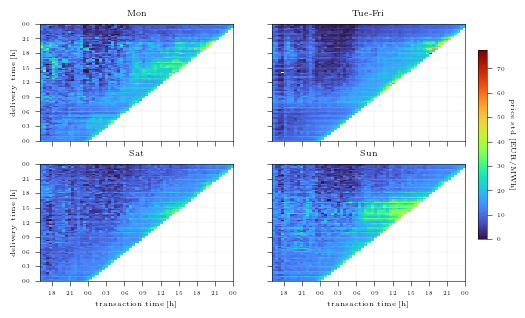

In [ ]:
fig, axs = plt.subplots(
    ncols=2, nrows=2, figsize=(Paper_width, 0.6 * Paper_width), sharex=True, sharey=True
)

titles = ["Mon", "Tue-Fri", "Sat", "Sun"]

for idx, wday, ax in zip(range(4), [[0], [1, 2, 3, 4], [5], [6]], axs.flat):
    if idx != 1:
        df_copy_0 = df_copy[
            ["Datetime from", "Datetime offer time", "Price (EUR)"]
        ].copy(deep=True)
        df_copy_0 = df_copy_0[
            (
                df_copy_0["Datetime from"].dt.date
                != df_copy_0["Datetime offer time"].dt.date
            )
            & (df_copy_0["Datetime from"].dt.weekday.isin(wday))
        ]
        df_copy_0["Datetime offer time"] = pd.to_datetime(
            df_copy_0["Datetime offer time"]
        ).dt.time
        df_copy_0["Datetime from"] = pd.to_datetime(df_copy_0["Datetime from"]).dt.time

        price_avged = df_copy_0.groupby(["Datetime from", "Datetime offer time"]).std()[
            "Price (EUR)"
        ]

        total_matrix_0 = np.zeros((96, 24 * 60)) * np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_0[
                    i,
                    (
                        datetime.combine(date.today(), g[0])
                        - datetime.today().replace(
                            hour=0, minute=0, second=0, microsecond=0
                        )
                    ).seconds
                    // 60,
                ] = g[1].to_numpy()[0]
        df_copy_1 = df_copy[
            ["Datetime from", "Datetime offer time", "Price (EUR)"]
        ].copy(deep=True)
        df_copy_1 = df_copy_1[
            (
                df_copy_1["Datetime from"].dt.date
                == df_copy_1["Datetime offer time"].dt.date
            )
            & (df_copy_1["Datetime from"].dt.weekday.isin(wday))
        ]
        df_copy_1["Datetime offer time"] = pd.to_datetime(
            df_copy_1["Datetime offer time"]
        ).dt.time
        df_copy_1["Datetime from"] = pd.to_datetime(df_copy_1["Datetime from"]).dt.time

        price_avged = df_copy_1.groupby(["Datetime from", "Datetime offer time"]).std()[
            "Price (EUR)"
        ]

        total_matrix_1 = np.zeros((96, 24 * 60)) * np.nan
        for i, group in enumerate(price_avged.groupby(level=0)):
            for j, g in enumerate(group[1].groupby(level=1)):
                total_matrix_1[
                    i + 1,
                    (
                        datetime.combine(date.today(), g[0])
                        - datetime.today().replace(
                            hour=0, minute=0, second=0, microsecond=0
                        )
                    ).seconds
                    // 60,
                ] = g[1].to_numpy()[0]
        total_matrix = np.hstack((total_matrix_0, total_matrix_1))

    else:
        total_matrix_4_days = np.zeros((96, 48 * 60))
        for day in wday:
            df_copy_0 = df_copy[
                ["Datetime from", "Datetime offer time", "Price (EUR)"]
            ].copy(deep=True)
            df_copy_0 = df_copy_0[
                (
                    df_copy_0["Datetime from"].dt.date
                    != df_copy_0["Datetime offer time"].dt.date
                )
                & (df_copy_0["Datetime from"].dt.weekday.isin([day]))
            ]
            df_copy_0["Datetime offer time"] = pd.to_datetime(
                df_copy_0["Datetime offer time"]
            ).dt.time
            df_copy_0["Datetime from"] = pd.to_datetime(
                df_copy_0["Datetime from"]
            ).dt.time

            price_avged = df_copy_0.groupby(
                ["Datetime from", "Datetime offer time"]
            ).std()["Price (EUR)"]

            total_matrix_0 = np.zeros((96, 24 * 60))
            for i, group in enumerate(price_avged.groupby(level=0)):
                for j, g in enumerate(group[1].groupby(level=1)):
                    total_matrix_0[
                        i,
                        (
                            datetime.combine(date.today(), g[0])
                            - datetime.today().replace(
                                hour=0, minute=0, second=0, microsecond=0
                            )
                        ).seconds
                        // 60,
                    ] = g[1].to_numpy()[0]
            df_copy_1 = df_copy[
                ["Datetime from", "Datetime offer time", "Price (EUR)"]
            ].copy(deep=True)
            df_copy_1 = df_copy_1[
                (
                    df_copy_1["Datetime from"].dt.date
                    == df_copy_1["Datetime offer time"].dt.date
                )
                & (df_copy_1["Datetime from"].dt.weekday.isin([day]))
            ]
            df_copy_1["Datetime offer time"] = pd.to_datetime(
                df_copy_1["Datetime offer time"]
            ).dt.time
            df_copy_1["Datetime from"] = pd.to_datetime(
                df_copy_1["Datetime from"]
            ).dt.time

            price_avged = df_copy_1.groupby(
                ["Datetime from", "Datetime offer time"]
            ).std()["Price (EUR)"]

            total_matrix_1 = np.zeros((96, 24 * 60))
            for i, group in enumerate(price_avged.groupby(level=0)):
                for j, g in enumerate(group[1].groupby(level=1)):
                    total_matrix_1[
                        i + 1,
                        (
                            datetime.combine(date.today(), g[0])
                            - datetime.today().replace(
                                hour=0, minute=0, second=0, microsecond=0
                            )
                        ).seconds
                        // 60,
                    ] = g[1].to_numpy()[0]
            total_matrix = np.hstack((total_matrix_0, total_matrix_1))
            total_matrix_4_days = np.sum(
                np.dstack((total_matrix_4_days, total_matrix)), 2
            )
        total_matrix = total_matrix_4_days / 4
        total_matrix[total_matrix == 0] = np.nan
    im = ax.imshow(
        np.nanmean(total_matrix.reshape((96, 1440 // 30 * 2, 30)), axis=2)[:, 32:-1],
        origin="lower",
        aspect="auto",
        cmap="turbo",
        extent=[
            datetime.today().replace(hour=16, minute=0, second=0, microsecond=0),
            date.today() + timedelta(days=2),
            date.today() + timedelta(days=1),
            date.today() + timedelta(days=2) - timedelta(minutes=15),
        ],
        interpolation="none",
        vmin=0,
        vmax=77.45597441758358,
    )

    ax.xaxis_date()
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    ax.yaxis_date()
    ax.yaxis.set_major_formatter(mdates.DateFormatter("%H"))

    if idx > 1:
        ax.set_xlabel("transaction time [h]")
    if idx in [0, 2]:
        ax.set_ylabel("delivery time [h]")
    ax.grid(visible=True, linewidth=0.1)
    ax.set_title(titles[idx])

fig.autofmt_xdate(rotation=0, ha="center")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.31, 0.015, 0.5])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("price std [EUR/MWh]", rotation=270, labelpad=8)
plt.savefig(
    "Paper_Figures/mon_aggtuefri_sat_sun_3D_avg_daily_std.pdf", bbox_inches="tight"
)